A1.

Can we identify which customer is at risk of churning based on similarities?

I will be using k-means to answer our question.

A2.

The goal of this analysis is to help the company use the information they have to better understand their customer and determine which customers are at risk of churning.

B1.

k-means clustering will group data points that are similar together and this will help discover patterns. For the dataset being used, the expected outcome is to identify similar features about customers and identify a certain pattern between churned and non-churned customers. 

B2.

'The assumption is that k-means is an optimization algorithm and the minimize the sum of squred errors', (Robinson, 2015). K-means can unintuitively produce unexpected clusters.

B3.

The packages used for this analysis will be for the Python language: 
   numpy, for operating with arrays 
   pandas, for statistical data analysis and manipulation 
   seaborn, for data visualization 
   matplotlib, for plotting data visualization 
   sklearn, for running methods and models
   scipy, for pearsonr to run pearsons correlation

C1.

a preprocessing goal is to perform scalar or normalization on the dataset, this will help when the dataset has a high variance. Scaler will help features to be more equal in variance

C2.

The initial dataset will include both continuous and categorical variables and is as followed: 
'Tenure' - continuous variable 
'MonthlyCharge' - continuous variable 
'Bandwidth_GB_Year' - continuous variable 
'Income' - continuous variable 
'Yearly_equip_failure - continuous variable 
'Outage_sec_perweek' - continuous variable 
'Email' - continuous variable 
'Contacts' - continuous variable 
'Children' - continuous variable

'Area' - categorical variable 
'Marital' - categorical variable 
'Gender' - categorical variable 
'Churn' - categorical variable 
'Techie' - categorical variable 
'Contract' - categorical variable 
'Port_modem' - categorical variable 
'Tablet' - categorical variable 
'InternetService - categorical variable 
'Phone' - categorical variable 
'Multiple' - categorical variable 
'OnlineSecurity' - categorical variable 
'OnlineBackup' - categorical variable 
'DeviceProtection' - categorical variable 
'TechSupport' - categorical variable 
'StreamingTV' - categorical variable 
'StreamingMovies' - categorical variable 
'PaperlessBilling' - categorical variable 
'PaymentMethod' - categorical variable 
'TimelyResponse' - ordinal categorical 
'Fixes' - ordinal categorical 
'Replacements' - ordinal categorical 
'Reliability' - ordinal categorical 
'Options' - ordinal categorical 
'Respecfulness' - ordinal categorical 
'Courteous' - ordinal categorical 
'Listening' - ordinal categorical

C3.

-import dataset into dataframe 
-check variables for any corrections needed such as improper naming and title check data type 
-drop less meaningful variables 
-check missing data 
-run summary statistics
-create dummy variables for categorical variables to numerical values
-look over univariate and bivariate visualizaitons for outliers and discrepancies 
-move target variable to the end of dataframe 
-set prepared dataset into a new dataframe for running regression

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
df= pd.read_csv('churn_clean.csv')
df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


In [3]:
df.rename(columns={'Item1':'TimelyResponse','Item2':'Fixes','Item3':'Replacements','Item4':'Reliability','Item5':'Options','Item6':'Respectfulness','Item7':'Courteous','Item8':'Listening'}, inplace=True)


In [4]:
df.columns


Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'TimelyResponse', 'Fixes', 'Replacements',
       'Reliability', 'Options', 'Respectfulness', 'Courteous', 'Listening'],
      dtype='object')

In [5]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082813,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141369,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [6]:
df.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [7]:
df.dtypes

CaseOrder                 int64
Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSe

In [8]:
df=df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 
                            'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 
                            'Area', 'TimeZone', 'Job', 'Marital', 'PaymentMethod'])

In [9]:
df

,Children,Age,Income,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,...,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
0,0,68,28561.99,Male,No,7.978323,10,0,1,No,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,1,27,21704.77,Female,Yes,11.699080,12,0,1,Yes,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,4,50,9609.57,Female,No,10.752800,9,0,1,Yes,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,1,48,18925.23,Male,No,14.913540,15,2,0,Yes,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,0,83,40074.19,Male,Yes,8.147417,16,2,1,No,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,23,55723.74,Male,No,9.415935,12,2,0,No,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,4,48,34129.34,Male,No,6.740547,15,2,0,No,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,1,48,45983.43,Female,No,6.590911,10,0,0,No,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,1,39,16667.58,Male,No,12.071910,14,1,0,No,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


In [10]:
df.columns

Index(['Children', 'Age', 'Income', 'Gender', 'Churn', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract',
       'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'TimelyResponse', 'Fixes',
       'Replacements', 'Reliability', 'Options', 'Respectfulness', 'Courteous',
       'Listening'],
      dtype='object')

In [11]:
df=pd.get_dummies(df)

In [12]:
df

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,...,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes
0,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110,...,1,0,1,0,1,0,0,1,0,1
1,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766,...,1,0,1,0,0,1,0,1,0,1
2,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961,...,1,0,1,0,1,0,0,1,0,1
3,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412,...,1,0,1,0,0,1,1,0,0,1
4,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,23,55723.74,9.415935,12,2,0,68.197130,159.979400,6511.252601,...,0,1,1,0,1,0,1,0,1,0
9996,4,48,34129.34,6.740547,15,2,0,61.040370,207.481100,5695.951810,...,0,1,1,0,0,1,1,0,1,0
9997,1,48,45983.43,6.590911,10,0,0,47.416890,169.974100,4159.305799,...,1,0,1,0,1,0,1,0,0,1
9998,1,39,16667.58,12.071910,14,1,0,71.095600,252.624000,6468.456752,...,1,0,0,1,0,1,0,1,0,1


In [13]:
df.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,...,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,...,0.561400,0.438600,0.625000,0.375000,0.507100,0.492900,0.511000,0.489000,0.411800,0.588200
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,...,0.496241,0.496241,0.484147,0.484147,0.499975,0.499975,0.499904,0.499904,0.492184,0.492184
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141369,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df.columns

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'TimelyResponse', 'Fixes', 'Replacements', 'Reliability', 'Options',
       'Respectfulness', 'Courteous', 'Listening', 'Gender_Female',
       'Gender_Male', 'Gender_Nonbinary', 'Churn_No', 'Churn_Yes', 'Techie_No',
       'Techie_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two Year', 'Port_modem_No', 'Port_modem_Yes', 'Tablet_No',
       'Tablet_Yes', 'InternetService_DSL', 'InternetService_Fiber Optic',
       'InternetService_None', 'Phone_No', 'Phone_Yes', 'Multiple_No',
       'Multiple_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'PaperlessBilling_No', 'Pape

In [15]:
df=df.drop(columns=['Gender_Female','Gender_Nonbinary', 'Churn_No', 'Techie_No','Contract_Month-to-month', 'Contract_One year','Port_modem_No', 'Tablet_No','InternetService_DSL','InternetService_None','Phone_No','Multiple_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No','PaperlessBilling_No'])


C:\Users\Michael Le\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tenure'>

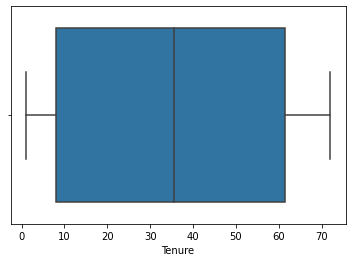

In [16]:
sns.boxplot('Tenure', data=df)

C:\Users\Michael Le\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyCharge'>

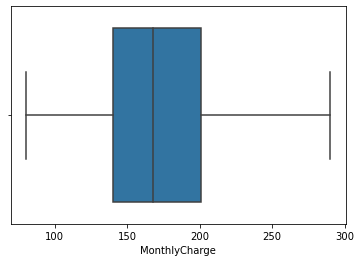

In [17]:
sns.boxplot('MonthlyCharge', data=df)

C:\Users\Michael Le\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bandwidth_GB_Year'>

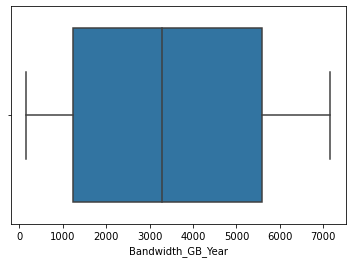

In [18]:
sns.boxplot('Bandwidth_GB_Year', data=df)

C:\Users\Michael Le\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outage_sec_perweek'>

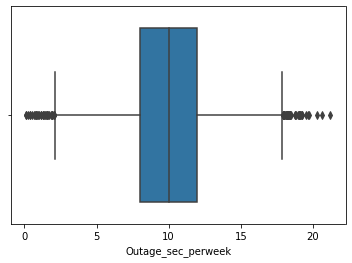

In [19]:
sns.boxplot('Outage_sec_perweek', data=df)

C:\Users\Michael Le\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Children'>

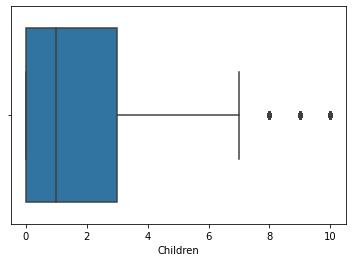

In [20]:
sns.boxplot('Children', data=df)

C:\Users\Michael Le\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

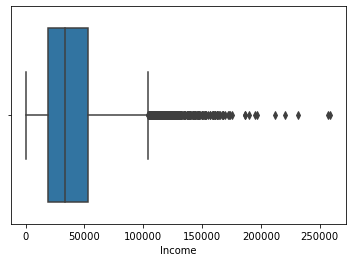

In [21]:
sns.boxplot('Income', data=df)

C:\Users\Michael Le\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Yearly_equip_failure'>

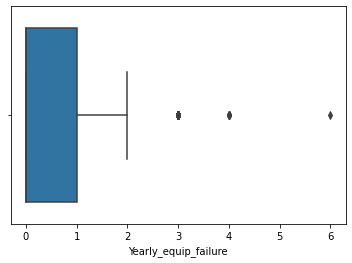

In [22]:
sns.boxplot('Yearly_equip_failure', data=df)

C:\Users\Michael Le\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Email'>

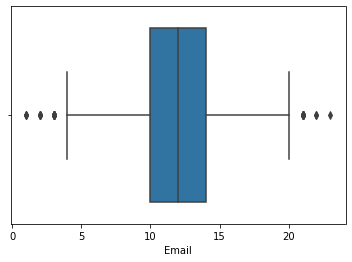

In [23]:
sns.boxplot('Email', data=df)

C:\Users\Michael Le\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Contacts'>

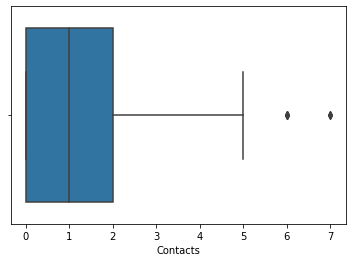

In [24]:
sns.boxplot('Contacts', data=df)

C:\Users\Michael Le\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

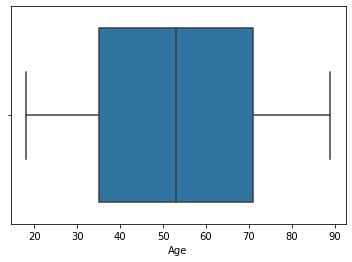

In [25]:
sns.boxplot('Age', data=df)

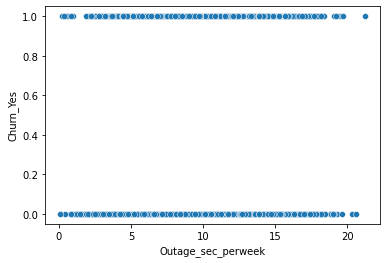

In [26]:
sns.scatterplot(x=df['Outage_sec_perweek'],y=df['Churn_Yes'])
plt.show()

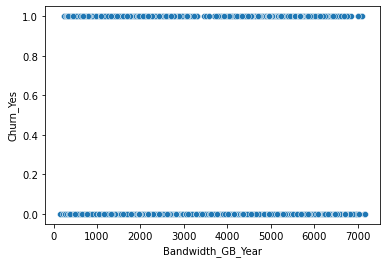

In [27]:
sns.scatterplot(x=df['Bandwidth_GB_Year'],y=df['Churn_Yes'])
plt.show()

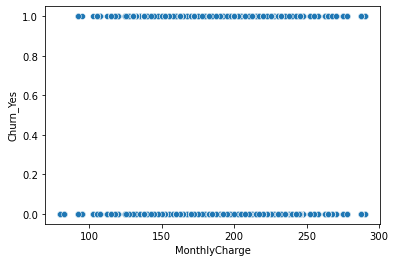

In [28]:
sns.scatterplot(x=df['MonthlyCharge'],y=df['Churn_Yes'])
plt.show()

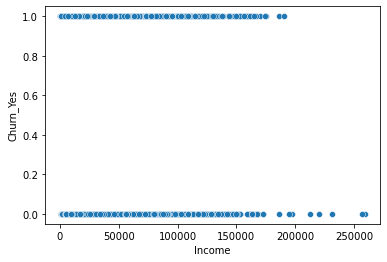

In [29]:
sns.scatterplot(x=df['Income'],y=df['Churn_Yes'])
plt.show()

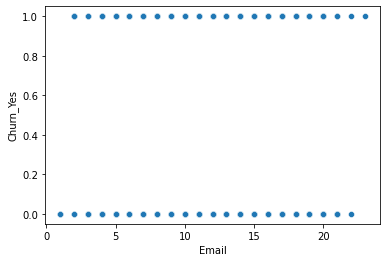

In [30]:
sns.scatterplot(x=df['Email'],y=df['Churn_Yes'])
plt.show()

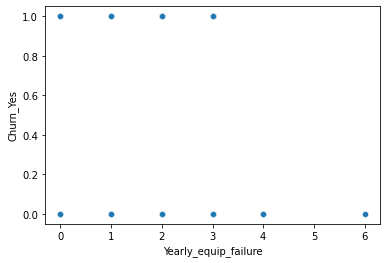

In [31]:
sns.scatterplot(x=df['Yearly_equip_failure'],y=df['Churn_Yes'])
plt.show()

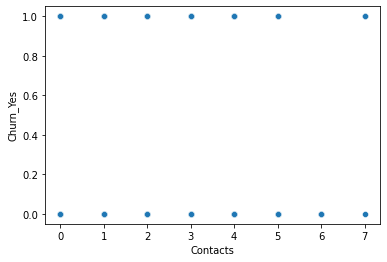

In [32]:
sns.scatterplot(x=df['Contacts'],y=df['Churn_Yes'])
plt.show()

C4.

In [33]:
df.to_csv('df_prepared_PA1.csv')

D1.

D2.

In [34]:
df= pd.read_csv('df_prepared_PA1.csv')

In [35]:
from scipy.cluster.vq import whiten

In [36]:
data = df

In [37]:
scaled_data = whiten(data)
print(scaled_data)

[[0.00000000e+00 0.00000000e+00 3.28536593e+00 ... 0.00000000e+00
  2.00048418e+00 2.03186252e+00]
 [3.46410163e-04 4.65745993e-01 1.30448353e+00 ... 2.00020167e+00
  2.00048418e+00 2.03186252e+00]
 [6.92820326e-04 1.86298397e+00 2.41571024e+00 ... 0.00000000e+00
  2.00048418e+00 2.03186252e+00]
 ...
 [3.46306240e+00 4.65745993e-01 2.31908183e+00 ... 0.00000000e+00
  0.00000000e+00 2.03186252e+00]
 [3.46340881e+00 4.65745993e-01 1.88425399e+00 ... 2.00020167e+00
  2.00048418e+00 2.03186252e+00]
 [3.46375522e+00 4.65745993e-01 1.35279774e+00 ... 0.00000000e+00
  2.00048418e+00 2.03186252e+00]]


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [38]:
model = KMeans(n_clusters=4)

In [48]:
model.fit(df[['Tenure','MonthlyCharge']])

KMeans(n_clusters=4)

In [40]:
labels = model.predict(df[['Tenure','MonthlyCharge']])

In [41]:
labels

array([3, 0, 3, ..., 1, 2, 2])

In [42]:
df['cluster'] = labels
print(df[['Tenure','MonthlyCharge','cluster']])

         Tenure  MonthlyCharge  cluster
0      6.795513     172.455519        3
1      1.156681     242.632554        0
2     15.754144     159.947583        3
3     17.087227     119.956840        3
4      1.670972     149.948316        3
...         ...            ...      ...
9995  68.197130     159.979400        1
9996  61.040370     207.481100        2
9997  47.416890     169.974100        1
9998  71.095600     252.624000        2
9999  63.350860     217.484000        2

[10000 rows x 3 columns]


No handles with labels found to put in legend.


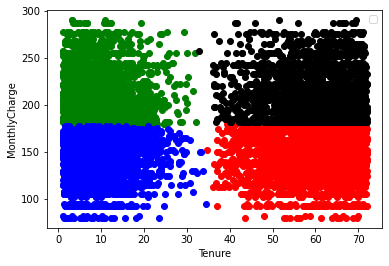

In [43]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]

plt.scatter(df1.Tenure, df1['MonthlyCharge'],color='green')
plt.scatter(df2.Tenure, df2['MonthlyCharge'],color='red')
plt.scatter(df3.Tenure, df3['MonthlyCharge'],color='black')
plt.scatter(df4.Tenure, df4['MonthlyCharge'],color='blue')

plt.xlabel('Tenure')
plt.ylabel('MonthlyCharge')
plt.legend()

In [44]:
scaler = MinMaxScaler()
scaler.fit(df[['Tenure']])
df['Tenure'] = scaler.transform(df['Tenure'])

ValueError: Expected 2D array, got 1D array instead:
array=[ 6.79551295  1.156681   15.75414408 ... 47.41689    71.0956
 63.35086   ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

E1.

E2.

E3.

E4.

F.

G.

H.

Robinson, D. (2015, January 16). K-means clustering is not a free lunch. Variance Explained. Retrieved January 11, 2022, from http://varianceexplained.org/r/kmeans-free-lunch/ 